## Google Trends API using Python 3.7


Error in python 3.7 package:

from pandas.io.json import json_normalize ModuleNotFoundError: No module named 'pandas.io'; 'pandas' is not a package

Solution:https://stackoverflow.com/questions/57218531/modulenotfounderror-no-module-named-pandas-io-for-json-normalize

+ Go to ...\Lib\site-packages\pytrends on your local disk and open file request.py
+ Change: *from **pandas.io.json._normalize** import nested_to_record* to **from pandas.io.json.normalize** import nested_to_record*

For documentation:

https://pypi.org/project/pytrends/#interest-by-region


In [1]:
import pandas as pd
from pytrends.request import TrendReq
wlist='coronavirus'
pytrend=TrendReq()
pytrend.build_payload(kw_list=[wlist])
# Interest by Region
df = pytrend.interest_by_region()
df.head(10)
tlist=df.sort_values(wlist,ascending=False).head(n=10)
tlist

,coronavirus
geoName,
Italy,100
Singapore,49
Switzerland,45
Ireland,43
Spain,42
France,40
Germany,33
Austria,31
New Zealand,30


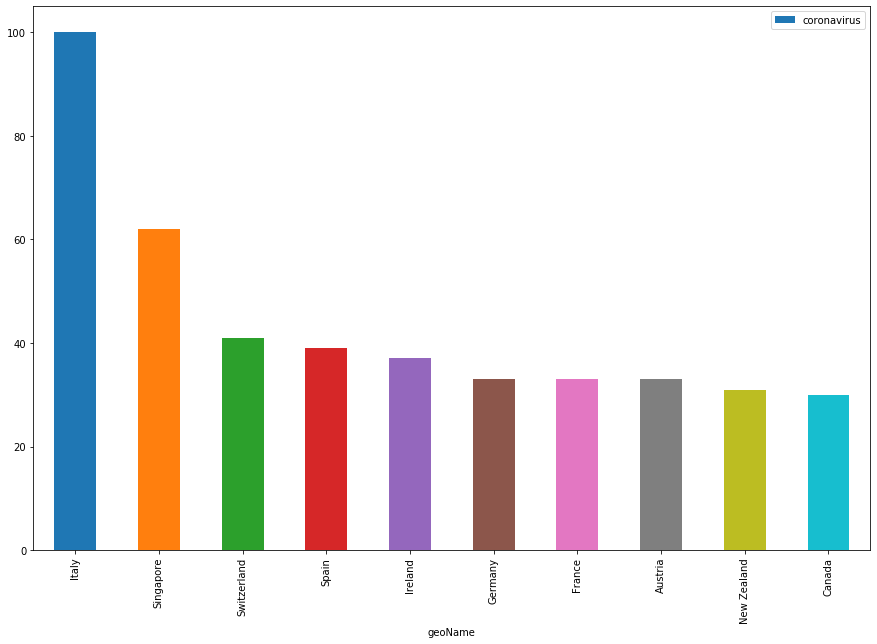

In [102]:
tlist.reset_index().plot(x='geoName', y=wlist, figsize=(15, 10), kind ='bar');

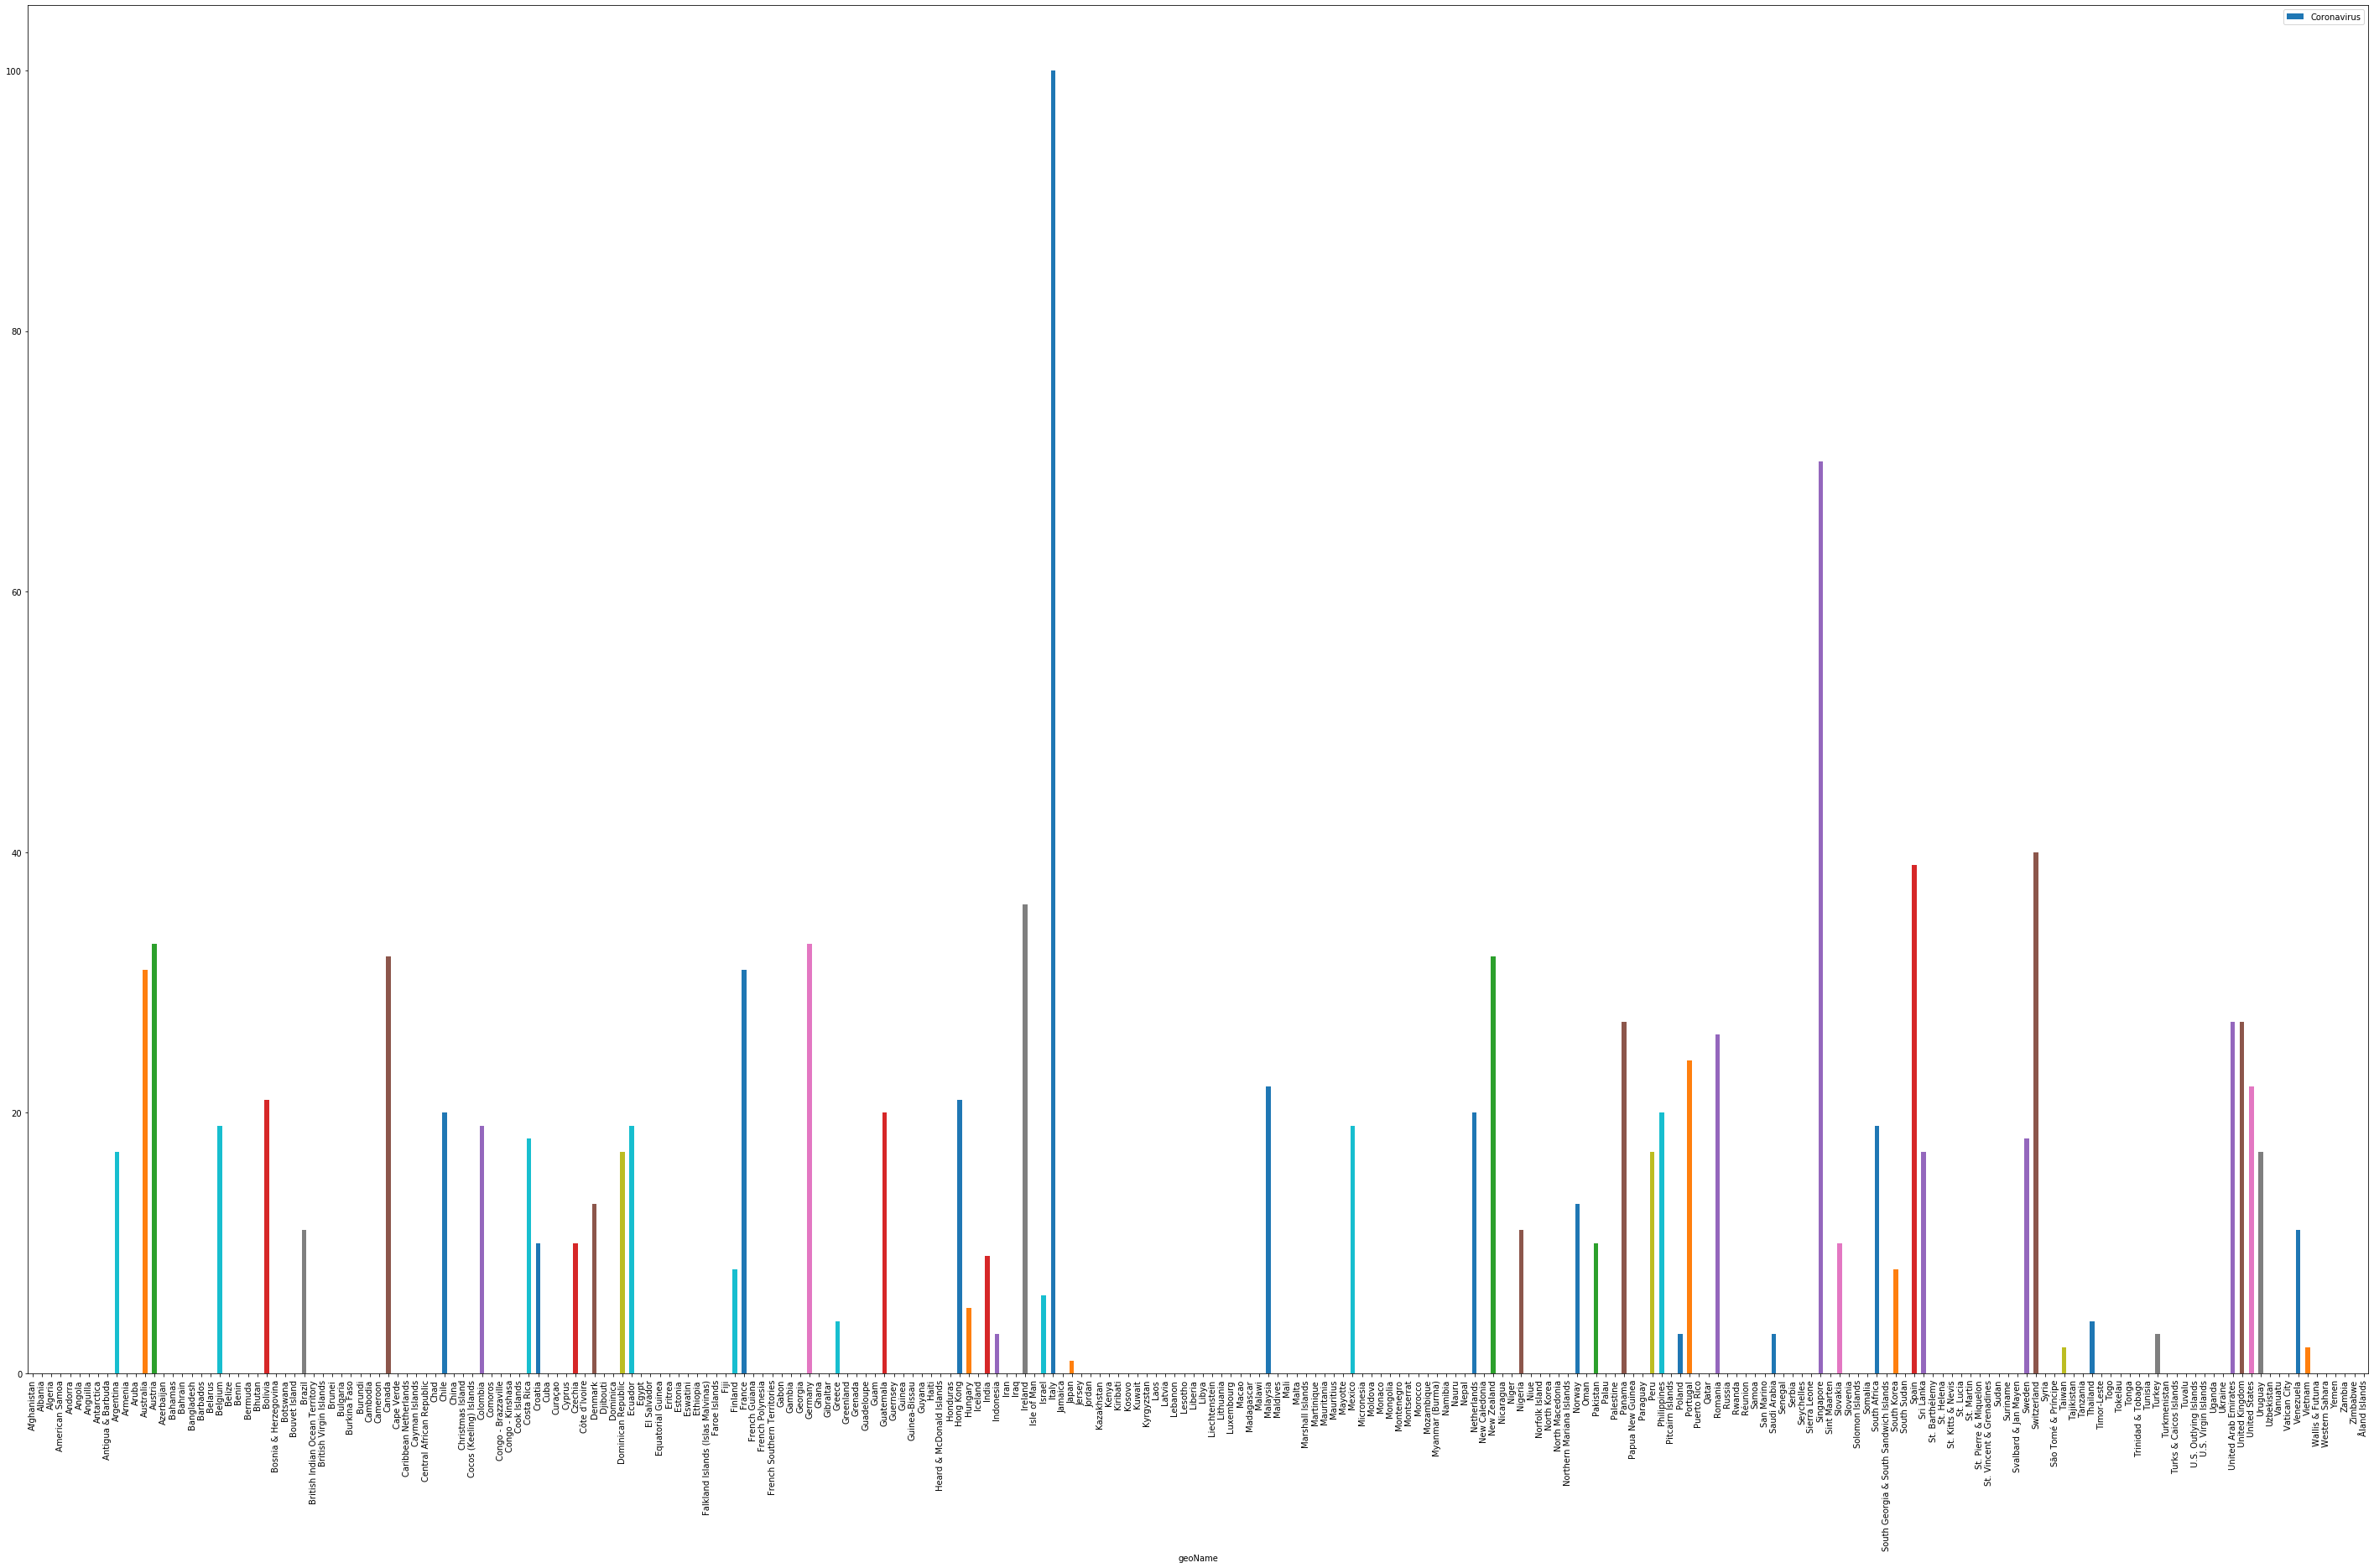

In [42]:
df.reset_index().plot(x='geoName', y='Coronavirus', figsize=(50, 30), kind ='bar');

In [75]:
# Get Google Hot Trends data
df = pytrend.trending_searches(pn='canada')
df.head()

,0
0,Dow Jones
1,VOCM
2,Orbeez
3,Jack Welch
4,Katharine Morel


In [100]:
pytrend.trending_searches(pn='portugal')

,0
0,Classificação
1,Mapa coronavirus
2,Ana Marques
3,Graça Freitas
4,James Lipton
5,Coronavirus
6,Coronavirus Portugal
7,Porto
8,Noticias ao Minuto
9,Noticias


In [80]:
df = pytrend.today_searches(pn='IT')
df.head(n=10)

0        Real Madrid-Barcellona
1                          Ulay
2               Justine Mattera
3          Coronavirus Sardegna
4               Luca Tommassini
5      Elezioni suppletive Roma
6           Coronavirus Pomezia
7                    Alfa Romeo
8    Riapertura scuole Piemonte
9          Coronavirus Cagliari
Name: query, dtype: object

In [32]:
# Get Google Keyword Suggestions
keywords = pytrend.suggestions(keyword='Coronavirus')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # This column makes no sense

,title,type
0,Coronavirus,Virus
1,SARS coronavirus,Virus
2,Middle East respiratory syndrome-related coron...,Virus
3,Canine coronavirus,Virus
4,Turkey coronavirus,Virus


In [81]:
pytrend.build_payload(kw_list=['Coronavirus'])

In [82]:
# Related Queries, returns a dictionary of dataframes
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                       query  value
0         virus coronavirus    100
1                     virus     99
2                    corona     96
3                     china     88
4         coronavirus china     88
5      symptoms coronavirus     86
6                  symptoms     84
7          news coronavirus     75
8              corona virus     61
9        coronavirus update     56
10       italia coronavirus     52
11         coronavirus 2020     42
12           el coronavirus     40
13        wuhan coronavirus     33
14          coronavirus map     33
15                    wuhan     33
16        coronavirus death     32
17        coronavirus cases     32
18          usa coronavirus     32
19     sintomas coronavirus     31
20      what is coronavirus     30
21           uk coronavirus     25
22           us coronavirus     23
23  symptoms of coronavirus     23
24       coronavirus latest     21, 'rising':                            query   value
0               c

In [35]:
related_topic = pytrend.related_topics()
related_topic.values()

dict_values([{'rising':    formattedValue                                            link  \
0        Breakout       /trends/explore?q=/m/0l3cy&date=today+5-y   
1        Breakout       /trends/explore?q=/m/0bzjf&date=today+5-y   
2        Breakout     /trends/explore?q=/m/0rzr6nf&date=today+5-y   
3        Breakout    /trends/explore?q=/g/120tb493&date=today+5-y   
4        Breakout      /trends/explore?q=/m/015m08&date=today+5-y   
5        Breakout  /trends/explore?q=/g/11ckxx4f1g&date=today+5-y   
6        Breakout      /trends/explore?q=/m/018xnw&date=today+5-y   
7        Breakout      /trends/explore?q=/m/01g93y&date=today+5-y   
8        Breakout    /trends/explore?q=/g/1235wdfh&date=today+5-y   
9        Breakout       /trends/explore?q=/m/068cn&date=today+5-y   
10       Breakout      /trends/explore?q=/m/01jp4s&date=today+5-y   
11       Breakout       /trends/explore?q=/m/0dh5j&date=today+5-y   
12       Breakout      /trends/explore?q=/m/03f0rf&date=today+5-y   
13        

In [83]:
pytrends.suggestions('Coronavirus')

AttributeError: module 'pytrends' has no attribute 'suggestions'

In [91]:
pytrend.build_payload(kw_list=['Coronavirus'])
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                       query  value
0                     virus    100
1         virus coronavirus     98
2           the coronavirus     97
3                    corona     94
4                     china     87
5         china coronavirus     87
6      coronavirus symptoms     84
7          coronavirus news     75
8              corona virus     62
9        coronavirus update     58
10       coronavirus italia     54
11         coronavirus 2020     43
12           el coronavirus     39
13        coronavirus death     35
14          coronavirus map     34
15          coronavirus usa     33
16        coronavirus cases     32
17        coronavirus wuhan     32
18     coronavirus sintomas     32
19                    wuhan     32
20      what is coronavirus     31
21           coronavirus uk     26
22  symptoms of coronavirus     24
23           us coronavirus     24
24       coronavirus latest     21, 'rising':                          query   value
0             coron